In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##Q1 importing Local dataset

df = pd.read_excel(r'C:\Users\shaun.rolph\Desktop\Assignmentone\FoodEnvironmentAtlas.xls', sheet_name='LOCAL')
print(df)

         FIPS State    County  DIRSALES_FARMS07  DIRSALES_FARMS12  \
0      1001.0    AL   Autauga              25.0              51.0   
1      1003.0    AL   Baldwin              80.0             103.0   
2      1005.0    AL   Barbour              18.0              13.0   
3      1007.0    AL      Bibb              12.0              13.0   
4      1009.0    AL    Blount              84.0              88.0   
...       ...   ...       ...               ...               ...   
3139  56039.0    WY     Teton               4.0              11.0   
3140  56041.0    WY     Uinta              13.0              24.0   
3141  56043.0    WY  Washakie              25.0               5.0   
3142  56045.0    WY    Weston              15.0               3.0   
3143      NaN   NaN       NaN               NaN               NaN   

      PCH_DIRSALES_FARMS_07_12  PCT_LOCLFARM07  PCT_LOCLFARM12  \
0                   104.000000        6.024096       13.110540   
1                    28.750000        7

In [8]:
##Q1, removing variables not needed for analysis

df = pd.DataFrame(df, columns=['FMRKT18', 'State', 'County', 'FIPS'])
print(df)

      FMRKT18 State    County     FIPS
0         1.0    AL   Autauga   1001.0
1         4.0    AL   Baldwin   1003.0
2         4.0    AL   Barbour   1005.0
3         1.0    AL      Bibb   1007.0
4         1.0    AL    Blount   1009.0
...       ...   ...       ...      ...
3139      3.0    WY     Teton  56039.0
3140      2.0    WY     Uinta  56041.0
3141      2.0    WY  Washakie  56043.0
3142      2.0    WY    Weston  56045.0
3143      NaN   NaN       NaN      NaN

[3144 rows x 4 columns]


In [9]:
##Q1, looking at state sums
state_sum = df.groupby ('State') ['FMRKT18'].sum()
print(state_sum)

State
AK     38.0
AL    139.0
AR    109.0
AZ     91.0
CA    755.0
CO    161.0
CT    157.0
DC     58.0
DE     37.0
FL    259.0
GA    161.0
HI     98.0
IA    229.0
ID     64.0
IL    338.0
IN    195.0
KS    119.0
KY    132.0
LA     85.0
MA    325.0
MD    161.0
ME     98.0
MI    341.0
MN    196.0
MO    256.0
MS     82.0
MT     70.0
NC    253.0
ND     65.0
NE    103.0
NH     96.0
NJ    150.0
NM     70.0
NV     39.0
NY    673.0
OH    335.0
OK     71.0
OR    167.0
PA    307.0
RI     36.0
SC    135.0
SD     41.0
TN    131.0
TX    218.0
UT     45.0
VA    259.0
VT     91.0
WA    170.0
WI    309.0
WV     94.0
WY     49.0
Name: FMRKT18, dtype: float64


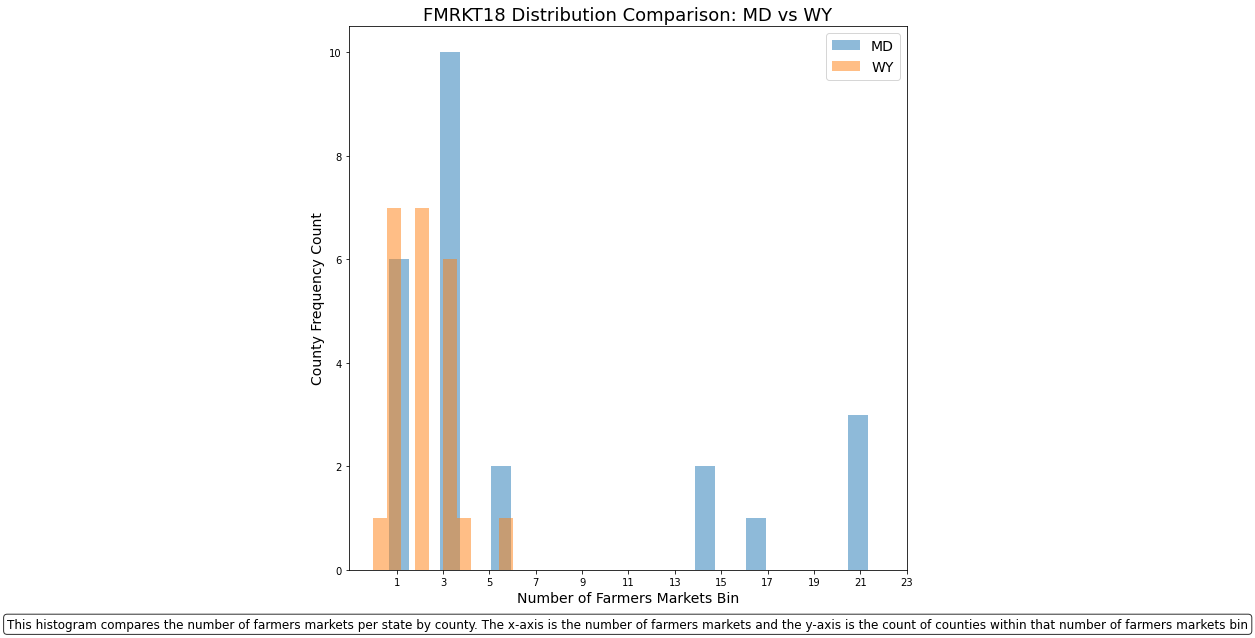

In [10]:

##Q1, filtering two states and comparing the frequency and county count of farmers markets

## List of states you want to filter by
state1 = 'MD'
state2 = 'WY'

## Filter the DataFrame for the two states
filtered_df_state1 = df[df['State'] == state1]
filtered_df_state2 = df[df['State'] == state2]

## Plot histograms for the frequency of the two filtered states
fig = plt.figure(figsize=(10,10))
plt.hist(filtered_df_state1['FMRKT18'], bins=10, alpha=0.5, label=state1, rwidth=0.4)
plt.hist(filtered_df_state2['FMRKT18'], bins=10, alpha=0.5, label=state2, rwidth=1)

## Add labels and a legend
plt.xlabel('Number of Farmers Markets Bin',fontsize=14)
plt.ylabel('County Frequency Count', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
x_ticks = (1,3,5,7,9,11,13,15,17,19,21,23,)
plt.xticks(x_ticks)
description = "This histogram compares the number of farmers markets per state by county. The x-axis is the number of farmers markets and the y-axis is the count of counties within that number of farmers markets bin"
bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.8)
plt.text(0.5, -0.1, description, transform=plt.gca().transAxes, fontsize=12, ha='center', va='center', bbox=bbox_props, multialignment='center')


## Show the histogram
plt.title(f'FMRKT18 Distribution Comparison: {state1} vs {state2}',fontsize=18)

plt.show()



In [11]:
##Q2, checking obersation count for local dataset to ensure merge keeps the same count
print(df)

      FMRKT18 State    County     FIPS
0         1.0    AL   Autauga   1001.0
1         4.0    AL   Baldwin   1003.0
2         4.0    AL   Barbour   1005.0
3         1.0    AL      Bibb   1007.0
4         1.0    AL    Blount   1009.0
...       ...   ...       ...      ...
3139      3.0    WY     Teton  56039.0
3140      2.0    WY     Uinta  56041.0
3141      2.0    WY  Washakie  56043.0
3142      2.0    WY    Weston  56045.0
3143      NaN   NaN       NaN      NaN

[3144 rows x 4 columns]


In [12]:
##Q2, looking at nulls
nan_counts = df.isna().sum()
print (nan_counts)

FMRKT18    2
State      1
County     1
FIPS       1
dtype: int64


In [13]:
##Q2, importing new dataset and removing all variables not needed.

df2 = pd.read_excel(r'C:\Users\shaun.rolph\Desktop\Assignmentone\FoodEnvironmentAtlas.xls', sheet_name='SOCIOECONOMIC')
df3 = pd.DataFrame(df2, columns=['METRO13', 'State', 'County', 'FIPS', 'PERPOV10' ])
print(df3)
df3.head()

      METRO13 State      County   FIPS  PERPOV10
0           1    AL     Autauga   1001         0
1           1    AL     Baldwin   1003         0
2           0    AL     Barbour   1005         1
3           1    AL        Bibb   1007         0
4           1    AL      Blount   1009         0
...       ...   ...         ...    ...       ...
3138        0    WY  Sweetwater  56037         0
3139        0    WY       Teton  56039         0
3140        0    WY       Uinta  56041         0
3141        0    WY    Washakie  56043         0
3142        0    WY      Weston  56045         0

[3143 rows x 5 columns]


,METRO13,State,County,FIPS,PERPOV10
0,1,AL,Autauga,1001,0
1,1,AL,Baldwin,1003,0
2,0,AL,Barbour,1005,1
3,1,AL,Bibb,1007,0
4,1,AL,Blount,1009,0


In [14]:
##Q2, merging datasets together and dropping duplicate values

df4 = df.merge(df3.drop_duplicates(subset=['County']), left_on = 'County', right_on='County', how= 'left' )
df4.head()

,FMRKT18,State_x,County,FIPS_x,METRO13,State_y,FIPS_y,PERPOV10
0,1.0,AL,Autauga,1001.0,1.0,AL,1001.0,0.0
1,4.0,AL,Baldwin,1003.0,1.0,AL,1003.0,0.0
2,4.0,AL,Barbour,1005.0,0.0,AL,1005.0,1.0
3,1.0,AL,Bibb,1007.0,1.0,AL,1007.0,0.0
4,1.0,AL,Blount,1009.0,1.0,AL,1009.0,0.0


In [15]:
##Q2, checking to ensure the obervsation are correct
num_rows = len(df4)
print (num_rows)

3144


In [22]:
##Q2, basic summary stats
summary_stats = df4.describe()
summary_stats.head()

,FMRKT18,FIPS_x,METRO13,FIPS_y,PERPOV10
count,3142.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,2.756525,30390.411709,0.375437,21124.890869,0.129176
std,5.819495,15164.717720,0.484313,16140.477598,0.335448
min,0.000000,1001.000000,0.000000,1001.000000,0.000000
25%,0.000000,18178.000000,0.000000,6033.000000,0.000000


In [114]:
##Q3, picking new variables to look at
## Chose PCH_VEG_ACRES_07_12, Vegetable acres harvested (% change), 2007 - 12 

df_local = pd.read_excel(r'C:\Users\shaun.rolph\Desktop\Assignmentone\FoodEnvironmentAtlas.xls', sheet_name='LOCAL')
df_Q3 = pd.DataFrame(df_local, columns=['PCH_VEG_ACRES_07_12', 'State', 'County'])
print(df_Q3)


      PCH_VEG_ACRES_07_12 State    County
0              -22.926829    AL   Autauga
1               16.445352    AL   Baldwin
2              -21.951220    AL   Barbour
3              364.285714    AL      Bibb
4              -13.589365    AL    Blount
...                   ...   ...       ...
3139                  NaN    WY     Teton
3140                  NaN    WY     Uinta
3141                  NaN    WY  Washakie
3142                  NaN    WY    Weston
3143                  NaN   NaN       NaN

[3144 rows x 3 columns]


In [115]:
##Q3, looking at mean of variables as well as the mean by state for each variable 

state_avg = df_Q3.groupby ('State') ['PCH_VEG_ACRES_07_12'].mean()
print(state_avg)

summary_stats2 = df_Q3.describe()
summary_stats2.head()

State
AK     20.937069
AL     57.710938
AR    166.518785
AZ     46.959504
CA     -2.031255
CO     59.896818
CT     16.444673
DC           NaN
DE     -0.616386
FL     27.992939
GA     85.285625
HI    -27.162635
IA     54.124204
ID     11.271127
IL     33.401852
IN     55.219645
KS     68.980816
KY     21.973297
LA     70.473581
MA     -4.971970
MD     17.410353
ME     -8.620396
MI     28.386049
MN     19.228454
MO    116.612897
MS     80.159362
MT     11.087211
NC     21.821135
ND    -27.857853
NE    -16.534186
NH    -14.824625
NJ     13.222205
NM     80.433532
NV    -84.946790
NY     23.562557
OH     88.879305
OK    111.783889
OR    -11.989939
PA     22.902289
RI     10.538774
SC     28.933993
SD    -17.631371
TN     25.728762
TX     74.674769
UT     51.349818
VA     81.699099
VT    -20.104338
WA    752.945750
WI     64.892296
WV     21.411860
WY     88.043478
Name: PCH_VEG_ACRES_07_12, dtype: float64


,PCH_VEG_ACRES_07_12
count,2060.000000
mean,59.202488
std,520.868530
min,-100.000000
25%,-29.988167


In [116]:
##Q4, looking as measures of center and spread
summary_stats3 = df_Q3.describe(percentiles=[.25, .5, .75])
print(summary_stats3)

       PCH_VEG_ACRES_07_12
count          2060.000000
mean             59.202488
std             520.868530
min            -100.000000
25%             -29.988167
50%               6.666667
75%              60.494643
max           22109.090909


In [117]:
##Q4, dropping nulls from dataset

dfQ3_droppednulls = df.dropna(subset=['PCH_VEG_ACRES_07_12'])

In [159]:
import numpy as np
from scipy.stats import zscore

##Q4, dropping all variables exept PCH_VEG_ACRES_07_12, Vegetable acres harvested (% change), 2007 - 12 
## and getting zscores for each data point as well as count of outliers

df_PCH_VEG_ACRES_07_12 = pd.DataFrame(dfQ3_droppednulls, columns=['PCH_VEG_ACRES_07_12'])                                                                                                                         
z_scores = stats.zscore(df_PCH_VEG_ACRES_07_12)

print (z_scores)

      PCH_VEG_ACRES_07_12
0               -0.157716
1               -0.082108
2               -0.155842
3                0.585862
4               -0.139785
...                   ...
3119             2.769411
3121            -0.177700
3126            -0.013497
3134            -0.049677
3136             0.462412

[2060 rows x 1 columns]


In [162]:
##Q4 Count of outliers 
threshold = 3
outliers_count = np.sum(np.abs(z_scores) > threshold)
num_rows1= len(outliers_count)
print(num_rows1)

1
